<a href="https://colab.research.google.com/github/FatemehMomeni/AdvDM_final/blob/main/DM_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Primitives

**Installations**

In [1]:
pip install advertools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 309 kB 9.5 MB/s 
     |████████████████████████████████| 264 kB 12.1 MB/s 
     |████████████████████████████████| 55 kB 4.9 MB/s 
     |████████████████████████████████| 251 kB 61.6 MB/s 
     |████████████████████████████████| 3.1 MB 57.9 MB/s 
     |████████████████████████████████| 4.0 MB 56.9 MB/s 
     |████████████████████████████████| 47 kB 6.2 MB/s 
     |████████████████████████████████| 93 kB 2.5 MB/s 
     |████████████████████████████████| 74 kB 4.3 MB/s 
  Created wheel for PyDispatcher: filename=PyDispatcher-2.0.5-py3-none-any.whl size=11516 sha256=2ff5c75305bf8b05128ea25c6463df982f7eaa66187764c47c44e8a6f3285300
  Stored in directory: /root/.cache/pip/wheels/2d/18/21/3c6a732eaa69a339198e08bb63b7da2c45933a3428b29ec454
Successfully built PyDispatcher


In [2]:
pip install parsivar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 36.2 MB 297 kB/s 
     |████████████████████████████████| 1.5 MB 13.2 MB/s 
  Created wheel for parsivar: filename=parsivar-0.2.3-py3-none-any.whl size=36492972 sha256=5eca201eb86368aefa1d77770796e6e4dc9b5dd43bf9064c528c4c666630554d
  Stored in directory: /root/.cache/pip/wheels/ae/67/7a/49cbf08f64d3f76a26eceaf0e481a40e233f05d4356875cbed
  Created wheel for nltk: filename=nltk-3.4.5-py3-none-any.whl size=1449921 sha256=2c805cfaa4038bf029435aed6887b4a4935159b13dea622b02cb0a9f8a307aaa
  Stored in directory: /root/.cache/pip/wheels/48/8b/7f/473521e0c731c6566d631b281f323842bbda9bd819eb9a3ead
Successfully built parsivar nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7


**Mount google drive**

In [3]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Train

**Read dataset**

In [4]:
import csv

train_list = list()
with open('/content/gdrive/MyDrive/Colab Notebooks/train.csv', encoding='utf-8-sig') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
      row = row[0].split('\t')
      row.pop(0)
      train_list.append(row)

**Make a dataframe**

In [5]:
import pandas as pd

train_list.pop(0)
train = pd.DataFrame(train_list, columns=['comment','label','label_id'])
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56700 entries, 0 to 56699
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   comment   56700 non-null  object
 1   label     56515 non-null  object
 2   label_id  56515 non-null  object
dtypes: object(3)
memory usage: 1.3+ MB
None


**Missing values**

In [ ]:
print(train.isnull().sum())

comment       0
label       185
label_id    185
dtype: int64


## Validation

**Read dataset**

In [6]:
valid_list = list()
with open('/content/gdrive/MyDrive/Colab Notebooks/dev.csv', encoding='utf-8-sig') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
      row = row[0].split('\t')
      row.pop(0)
      valid_list.append(row)

**Make a dataframe**

In [7]:
valid_list.pop(0)
valid = pd.DataFrame(valid_list, columns=['comment','label','label_id'])
print(valid.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6300 entries, 0 to 6299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   comment   6300 non-null   object
 1   label     6273 non-null   object
 2   label_id  6273 non-null   object
dtypes: object(3)
memory usage: 147.8+ KB
None


**Missing values**

In [ ]:
print(valid.isnull().sum())

comment      0
label       27
label_id    27
dtype: int64


# Preprocessing

## Train

**Drop rows whith missed label**

In [8]:
processed_train = train.dropna()
processed_train.reset_index(inplace=True)
processed_train.drop(axis=1, columns=['index','label'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


**Remove punctuations, duplicate letters and stop words**

In [9]:
def remove_consec_duplicates(s):
  new_s = ""
  prev = ""
  for c in s:
    if len(new_s) == 0:
      new_s += c
      prev = c
    if c == prev:
      continue
    else:
      new_s += c
      prev = c
  return new_s

In [10]:
import re
import advertools as adv
from string import punctuation
from itertools import groupby

# remove punctuation
processed_train['comment'] = processed_train['comment'].apply(lambda x: re.sub(f'[{punctuation}؟،٪×÷»«]+' , '', x))
# remove numbers
processed_train['comment'] = processed_train['comment'].apply(lambda x: re.sub(f'\d', '', x))
# remove duplicate letters
processed_train['comment'] = processed_train['comment'].apply(remove_consec_duplicates)
# remove stop words  
stop_words = list(adv.stopwords['persian'])
processed_train['comment'] = processed_train['comment'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

**Parsivar**

In [11]:
from parsivar import Normalizer

normalizer = Normalizer(pinglish_conversion_needed=True)

parsize = processed_train.copy()
parsize['comment'] = processed_train['comment'].apply(lambda x: normalizer.normalize(x))
parsize['comment'] = processed_train['comment'].apply(lambda x: x.replace("\u200c", ' '))

## Validation

**Drop rows whith missed label**

In [12]:
processed_valid = valid.dropna()
processed_valid.reset_index(inplace=True)
processed_valid.drop(axis=1, columns=['index','label'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


**Remove punctuations, duplicate letters and stop words**

In [13]:
# remove punctuation
processed_valid['comment'] = processed_valid['comment'].apply(lambda x: re.sub(f'[{punctuation}؟،٪×÷»«]+', '', x))
# remove numbers
processed_valid['comment'] = processed_valid['comment'].apply(lambda x: re.sub(f'\d', '', x))
# remove duplicate letters
processed_valid['comment'] = processed_valid['comment'].apply(remove_consec_duplicates)
# remove stop words  
processed_valid['comment'] = processed_valid['comment'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

**Parsivar**

In [14]:
parsize_valid = processed_valid.copy()
parsize_valid['comment'] = processed_valid['comment'].apply(lambda x: normalizer.normalize(x))
parsize_valid['comment'] = parsize_valid['comment'].apply(lambda x: x.replace("\u200c", ' '))

# Model

## Prepare datasets

**train**

In [15]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

embedding_dim = 64
corpus = 56515

X_train = parsize['comment'].tolist()
Y_train = parsize['label_id'].tolist()

tokenizer = Tokenizer(num_words=corpus, filters='None', lower=False, split=' ')
tokenizer.fit_on_texts(X_train)

x_train = np.array(tokenizer.texts_to_sequences(X_train))
x_train = pad_sequences(x_train, padding='post', maxlen=100)
y_train = np.asarray(tf.keras.utils.to_categorical(Y_train))

train_ds = tf.data.Dataset.from_tensor_slices((x_train,y_train))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  app.launch_new_instance()


**validation**

In [16]:
X_valid = parsize_valid['comment'].tolist()
Y_valid = parsize_valid['label_id'].tolist()

tokenizer.fit_on_texts(X_valid)

x_valid = np.array(tokenizer.texts_to_sequences(X_valid))
x_valid = pad_sequences(x_valid, padding='post', maxlen=100)
y_valid = np.asarray(tf.keras.utils.to_categorical(Y_valid))

valid_ds = tf.data.Dataset.from_tensor_slices((x_valid,y_valid))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


## Build models

**Word embedding**

In [17]:
!gdown --id 1NGz6nk59i8imCNrBcfSS_vZ_P31U-pjx

#https://drive.google.com/file/d/1NGz6nk59i8imCNrBcfSS_vZ_P31U-pjx/view?usp=sharing

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1NGz6nk59i8imCNrBcfSS_vZ_P31U-pjx
To: /content/61.zip
100% 730M/730M [00:02<00:00, 249MB/s]


In [18]:
import os
import zipfile

with zipfile.ZipFile('/content/61.zip', 'r') as zip_ref:
    zip_ref.extractall('/tmp/pre_embedding')

In [19]:
embeddings_index = dict()
with open('/tmp/pre_embedding/model.txt', encoding='ISO-8859-1') as f:
  for line in f:
    word, coefficients = line.split(maxsplit=1)
    coefficients = np.fromstring(coefficients, 'f', sep=' ')
    embeddings_index[word] = coefficients

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  del sys.path[0]


In [20]:
max_length = 100
word_index = tokenizer.word_index

embedding_matrix = np.zeros((len(word_index)+1, max_length))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [21]:
from tensorflow.keras.layers import Embedding

embedding_layer = Embedding(input_dim=len(word_index)+1, output_dim=max_length, weights=[embedding_matrix], input_length=max_length, trainable=True)

**CNN**

In [22]:
from tensorflow.keras import layers, losses

cnn_model = tf.keras.Sequential([embedding_layer])
cnn_model.add(tf.keras.layers.Conv1D(128, 2, activation='relu'))                               
cnn_model.add(tf.keras.layers.GlobalMaxPooling1D())
#cnn_model.add(tf.keras.layers.Dropout(0.5))
cnn_model.add(tf.keras.layers.Dense(2, activation='sigmoid'))
                              
#cnn_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=["CategoricalAccuracy"])
#cnn_history = cnn_model.fit(train_ds.shuffle(len(word_index)).batch(128), epochs=3, validation_data=valid_ds.batch(128))
cnn_model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
cnn_history = cnn_model.fit(train_ds.batch(128), epochs=10, validation_data=valid_ds.batch(128), verbose=1)

Epoch 1/10
442/442 [==============================] - 17s 7ms/step - loss: 0.4537 - accuracy: 0.7956 - val_loss: 0.6818 - val_accuracy: 0.6507
Epoch 2/10
442/442 [==============================] - 3s 6ms/step - loss: 0.3603 - accuracy: 0.8435 - val_loss: 0.7198 - val_accuracy: 0.6426
Epoch 3/10
442/442 [==============================] - 3s 6ms/step - loss: 0.3052 - accuracy: 0.8729 - val_loss: 0.7888 - val_accuracy: 0.6322
Epoch 4/10
442/442 [==============================] - 3s 6ms/step - loss: 0.2563 - accuracy: 0.8964 - val_loss: 0.8690 - val_accuracy: 0.6243
Epoch 5/10
442/442 [==============================] - 3s 6ms/step - loss: 0.2167 - accuracy: 0.9157 - val_loss: 0.9501 - val_accuracy: 0.6169
Epoch 6/10
442/442 [==============================] - 3s 6ms/step - loss: 0.1857 - accuracy: 0.9284 - val_loss: 1.0280 - val_accuracy: 0.6110
Epoch 7/10
442/442 [==============================] - 3s 6ms/step - loss: 0.1608 - accuracy: 0.9395 - val_loss: 1.1126 - val_accuracy: 0.6048
Epoch

**LSTM**

In [26]:
from tensorflow.keras.layers import LSTM, Dense, Bidirectional

lstm_model = tf.keras.Sequential([embedding_layer,
                                  Bidirectional(LSTM(64, return_sequences=True)),
                                  Bidirectional(LSTM(64)),
                                  Dense(128, activation='relu'),
                                  Dense(2, activation='sigmoid')])
                              
#lstm_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=["CategoricalAccuracy"])
lstm_model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
#lstm_history = lstm_model.fit(train_ds.shuffle(len(word_index)).batch(128), epochs=3, validation_data=valid_ds.batch(128), verbose=1)
lstm_history = lstm_model.fit(train_ds.batch(128), epochs=10, validation_data=valid_ds.batch(128), verbose=1)

Epoch 1/10
442/442 [==============================] - 20s 30ms/step - loss: 0.3491 - accuracy: 0.8467 - val_loss: 0.7759 - val_accuracy: 0.6310
Epoch 2/10
442/442 [==============================] - 12s 27ms/step - loss: 0.2726 - accuracy: 0.8871 - val_loss: 0.9191 - val_accuracy: 0.6188
Epoch 3/10
442/442 [==============================] - 12s 27ms/step - loss: 0.2122 - accuracy: 0.9145 - val_loss: 1.1177 - val_accuracy: 0.6080
Epoch 4/10
442/442 [==============================] - 12s 27ms/step - loss: 0.1726 - accuracy: 0.9318 - val_loss: 1.2682 - val_accuracy: 0.6091
Epoch 5/10
442/442 [==============================] - 12s 27ms/step - loss: 0.1472 - accuracy: 0.9413 - val_loss: 1.4054 - val_accuracy: 0.5968
Epoch 6/10
442/442 [==============================] - 12s 27ms/step - loss: 0.1358 - accuracy: 0.9453 - val_loss: 1.4482 - val_accuracy: 0.6011
Epoch 7/10
442/442 [==============================] - 12s 27ms/step - loss: 0.1241 - accuracy: 0.9490 - val_loss: 1.6254 - val_accuracy:

## Loss plots

**CNN**

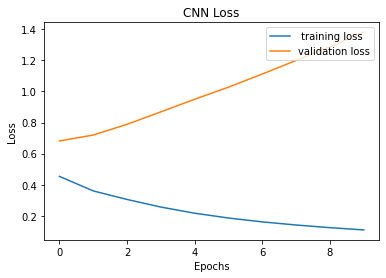

In [23]:
import matplotlib.pyplot as plt

plt.plot(cnn_history.history['loss'], label=' training loss')
plt.plot(cnn_history.history['val_loss'], label='validation loss')
plt.title('CNN Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

**LSTM**

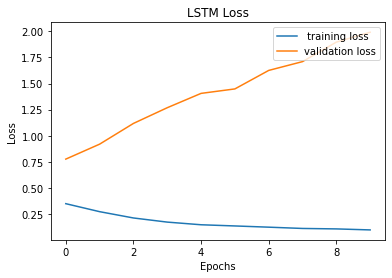

In [27]:
plt.plot(lstm_history.history['loss'], label=' training loss')
plt.plot(lstm_history.history['val_loss'], label='validation loss')
plt.title('LSTM Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

## Validation metrics

**CNN**

In [24]:
cnn_accuracy = cnn_model.evaluate(x_valid, y_valid, batch_size=128)
print(cnn_accuracy)

50/50 [==============================] - 0s 3ms/step - loss: 1.3813 - accuracy: 0.5978
[1.3813042640686035, 0.597800076007843]


In [25]:
from sklearn.metrics import classification_report


predictions = cnn_model.predict(x_valid)
predict_results = predictions.argmax(axis=1)

cnn_test = parsize_valid.copy()
cnn_test['pred_sentiment']= predict_results
cnn_test['pred_sentiment'] = np.where((cnn_test.pred_sentiment == 0),'0',cnn_test.pred_sentiment)
cnn_test['pred_sentiment'] = np.where((cnn_test.pred_sentiment == '1'),'1',cnn_test.pred_sentiment)

labels = ['0', '1']
print(classification_report(cnn_test['label_id'].tolist(),cnn_test['pred_sentiment'].tolist(),labels=labels))

              precision    recall  f1-score   support

           0       0.61      0.56      0.58      3135
           1       0.59      0.64      0.61      3138

    accuracy                           0.60      6273
   macro avg       0.60      0.60      0.60      6273
weighted avg       0.60      0.60      0.60      6273



**LSTM**

In [28]:
lstm_accuracy = lstm_model.evaluate(x_valid, y_valid, batch_size=128)
print(lstm_accuracy)

50/50 [==============================] - 1s 14ms/step - loss: 1.9910 - accuracy: 0.5997
[1.990997076034546, 0.5997130274772644]


In [29]:
predictions2 = lstm_model.predict(x_valid)
predict_results2 = predictions2.argmax(axis=1)

lstm_test = parsize_valid.copy()
lstm_test['pred_sentiment']= predict_results2
lstm_test['pred_sentiment'] = np.where((lstm_test.pred_sentiment == 0),'0',lstm_test.pred_sentiment)
lstm_test['pred_sentiment'] = np.where((lstm_test.pred_sentiment == '1'),'1',lstm_test.pred_sentiment)

print(classification_report(lstm_test['label_id'].tolist(),lstm_test['pred_sentiment'].tolist(),labels=labels))

              precision    recall  f1-score   support

           0       0.61      0.56      0.58      3135
           1       0.59      0.64      0.62      3138

    accuracy                           0.60      6273
   macro avg       0.60      0.60      0.60      6273
weighted avg       0.60      0.60      0.60      6273



## Save model

**CNN**

In [30]:
import json

cnn_model.save('/content/gdrive/MyDrive/Colab Notebooks/tf_cnn_model') 
json_string = tokenizer.to_json()
with open('/content/gdrive/MyDrive/Colab Notebooks/tokenizer.json', 'w') as outfile:
    json.dump(json_string, outfile)

2022-06-25 15:55:26,082 | INFO | builder_impl.py:780 | copy_assets_to_destination_dir | Assets written to: /content/gdrive/MyDrive/Colab Notebooks/tf_cnn_model/assets


**LSTM**

In [31]:
lstm_model.save('/content/gdrive/MyDrive/Colab Notebooks/tf_lstm_model') 

2022-06-25 15:55:49,212 | WARNING | save.py:265 | _initialize_nodes_and_concrete_functions | Found untraced functions such as lstm_cell_1_layer_call_fn, lstm_cell_1_layer_call_and_return_conditional_losses, lstm_cell_2_layer_call_fn, lstm_cell_2_layer_call_and_return_conditional_losses, lstm_cell_4_layer_call_fn while saving (showing 5 of 8). These functions will not be directly callable after loading.
2022-06-25 15:55:53,982 | INFO | builder_impl.py:780 | copy_assets_to_destination_dir | Assets written to: /content/gdrive/MyDrive/Colab Notebooks/tf_lstm_model/assets
2022-06-25 15:55:54,466 | WARNING | save.py:139 | generate_keras_metadata | <keras.layers.recurrent.LSTMCell object at 0x7fa97c363d90> has the same name 'LSTMCell' as a built-in Keras object. Consider renaming <class 'keras.layers.recurrent.LSTMCell'> to avoid naming conflicts when loading with `tf.keras.models.load_model`. If renaming is not possible, pass the object in the `custom_objects` parameter of the load function.

# Test

## CNN

**Read dataset**

In [32]:
test_list = list()
with open('/content/gdrive/MyDrive/Colab Notebooks/test.csv', encoding='utf-8-sig') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
      row = row[0].split('\t')
      row.pop(0)
      test_list.append(row)

test_list.pop(0)
test_data = pd.DataFrame(train_list, columns=['comment','label','label_id'])
print(test_data.info())

FileNotFoundError: ignored

**Load model**

In [33]:
new_cnn_model = tf.keras.models.load_model('/content/gdrive/MyDrive/Colab Notebooks/tf_cnn_model')
new_cnn_model.summary()

with open('/content/gdrive/MyDrive/Colab Notebooks/tokenizer.json') as json_file:
    json_string = json.load(json_file)
tokenizer_test = tf.keras.preprocessing.text.tokenizer_from_json(json_string)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          2551200   
                                                                 
 conv1d (Conv1D)             (None, 99, 128)           25728     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 2)                 258       
                                                                 
Total params: 2,577,186
Trainable params: 2,577,186
Non-trainable params: 0
_________________________________________________________________


**Generate predictions**

In [ ]:
x_test  = np.array(tokenizer_test.texts_to_sequences(test_data['comment'].tolist()))
x_test = pad_sequences(x_test, padding='post', maxlen=218)

predictions = new_cnn_model.predict(x_test)
predict_results = predictions.argmax(axis=1)

In [ ]:
from sklearn.metrics import classification_report

test = test_data.copy()
test['pred_sentiment']= predict_results
test['pred_sentiment'] = np.where((test.pred_sentiment == 0),'0',test.pred_sentiment)
test['pred_sentiment'] = np.where((test.pred_sentiment == '1'),'1',test.pred_sentiment)

labels = ['0', '1']
print(classification_report(test['label_id'].tolist(),test['pred_sentiment'].tolist(),labels=labels))

NameError: ignored

## LSTM

**Load model**

In [34]:
new_lstm_model = tf.keras.models.load_model('/content/gdrive/MyDrive/Colab Notebooks/tf_lstm_model')
new_lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          2551200   
                                                                 
 bidirectional (Bidirectiona  (None, 100, 128)         84480     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 2)                 258       
                                                                 
Total params: 2,751,266
Trainable params: 2,751,266
No

**Generate predictions**

In [ ]:
predictions2 = new_lstm_model.predict(x_test)
predict_results2 = predictions.argmax(axis=1)

test2 = test_data.copy()
test2['pred_sentiment']= predict_results2
test2['pred_sentiment'] = np.where((test2.pred_sentiment == 0),'0',test2.pred_sentiment)
test2['pred_sentiment'] = np.where((test2.pred_sentiment == '1'),'1',test2.pred_sentiment)

print(classification_report(test2['label_id'].tolist(),test2['pred_sentiment'].tolist(),labels=labels))

# Pretrained models

**mBERT**

In [ ]:
from transformers import pipeline, BertTokenizer, TFBertModel

unmasker = pipeline('fill-mask', model='bert-base-multilingual-cased')

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
mBERT_tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
mBERT_model = TFBertModel.from_pretrained("bert-base-multilingual-cased")
mBERT_model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
mBERT_model = mBERT_model.fit(train_ds.batch(128), epochs=10, validation_data=valid_ds.batch(128), verbose=1)

Some layers from the model checkpoint at bert-base-multilingual-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-multilingual-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Epoch 1/10


ValueError: ignored

**XLM-Roberta**

In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.2 MB 5.4 MB/s 


In [ ]:
from transformers import TFXLMRobertaModel
#from transformers import TFAutoModel, AutoTokenizer

#tokenizer = AutoTokenizer.from_pretrained('jplu/tf-xlm-roberta-base')
xlm_model = TFXLMRobertaModel.from_pretrained('jplu/tf-xlm-roberta-base')

Downloading:   0%|          | 0.00/512 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.76G [00:00<?, ?B/s]

Some layers from the model checkpoint at jplu/tf-xlm-roberta-base were not used when initializing TFXLMRobertaModel: ['lm_head']
- This IS expected if you are initializing TFXLMRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFXLMRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFXLMRobertaModel were initialized from the model checkpoint at jplu/tf-xlm-roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFXLMRobertaModel for predictions without further training.


In [ ]:
xlm_model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
xlm_model = xlm_model.fit(train_ds.batch(128), epochs=10, validation_data=valid_ds.batch(128), verbose=1)

Epoch 1/10


ValueError: ignored

In [ ]:
xlm_results = xlm_model.evaluate(x_valid, y_valid)
print(xlm_results)

ValueError: ignored